In [1]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [2]:
morpho_example_wide = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Wide.csv")

Wide = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_wide,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    format = "wide"
)

print(Wide.df)
print(Wide.format)
print(Wide.chemical)
print(Wide.plate)
print(Wide.well)
print(Wide.concentration)
print(Wide.endpoint)
print(Wide.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
wide
chemical.id
plate.id
well
conc
endpoint
value


In [3]:
morpho_example_long = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Morphology_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_long,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "conc",
    endpoint = "endpoint",
    value = "value"
)

print(Long.df)
print(Long.format)
print(Long.chemical)
print(Long.plate)
print(Long.well)
print(Long.concentration)
print(Long.endpoint)
print(Long.value)

       chemical.id  conc  plate.id well endpoint  value
0             3757   0.0     19877  H01     MO24    0.0
1             3757   0.0     19877  H02     MO24    0.0
2             3757   0.0     19877  H03     MO24    0.0
3             3757   0.0     19877  H04     MO24    0.0
4             3757   0.0     19877  H05     MO24    0.0
...            ...   ...       ...  ...      ...    ...
19867         3863  10.0     20637  H08     DNC_    0.0
19868         3863  10.0     20637  H09     DNC_    0.0
19869         3863  10.0     20637  H10     DNC_    0.0
19870         3863  10.0     20637  H11     DNC_    0.0
19871         3863  10.0     20637  H12     DNC_    0.0

[19872 rows x 6 columns]
long
chemical.id
plate.id
well
conc
endpoint
value


## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [4]:
endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], "DAVID":["MO24", "DP24"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"Test":["MO24"], "DAVID":["DP24"]})

Long.df

DAVID is already an existing endpoint


,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,Test,1.0
860,3863,10.0,20637,H09,Test,1.0
861,3863,10.0,20637,H10,Test,0.0
862,3863,10.0,20637,H11,Test,0.0


In [5]:
Long.report_combination

{'Test': ['MO24'],
 'DAVID': ['MO24', 'DP24'],
 'ANY24': ['MO24', 'DP24', 'SM24', 'NC24']}

In [6]:
Long.df[Long.df[Long.endpoint] == "DAVID"]

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,DAVID,0.0
1,3757,0.0,19877,H02,DAVID,0.0
2,3757,0.0,19877,H03,DAVID,0.0
3,3757,0.0,19877,H04,DAVID,0.0
4,3757,0.0,19877,H05,DAVID,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,DAVID,1.0
860,3863,10.0,20637,H09,DAVID,1.0
861,3863,10.0,20637,H10,DAVID,0.0
862,3863,10.0,20637,H11,DAVID,0.0


In [7]:
# Add new endpoint
Wide.combine_and_create_new_endpoints(endpoint_dict)

Wide.df

,chemical.id,conc,plate.id,well,endpoint,value
0,3757,0.0,19877,H01,MO24,0.0
1,3757,0.0,19877,H02,MO24,0.0
2,3757,0.0,19877,H03,MO24,0.0
3,3757,0.0,19877,H04,MO24,0.0
4,3757,0.0,19877,H05,MO24,0.0
...,...,...,...,...,...,...
859,3863,10.0,20637,H08,DAVID,1.0
860,3863,10.0,20637,H09,DAVID,1.0
861,3863,10.0,20637,H10,DAVID,0.0
862,3863,10.0,20637,H11,DAVID,0.0


#### Binary Class: Set wells to NA

In [8]:
Long.set_well_to_na(endpoint_name = "DNC_", endpoint_value = 1)

# All of these wells should be NA 
Long.df[Long.df["bmdrc.Well.ID"] == "3757 21.9 19877 B01"]


,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
216,3757,21.9,19877,B01,MO24,NaN,3757 21.9 19877 B01
1080,3757,21.9,19877,B01,DP24,NaN,3757 21.9 19877 B01
1944,3757,21.9,19877,B01,SM24,NaN,3757 21.9 19877 B01
2808,3757,21.9,19877,B01,NC24,NaN,3757 21.9 19877 B01
3672,3757,21.9,19877,B01,MORT,NaN,3757 21.9 19877 B01
4536,3757,21.9,19877,B01,YSE_,NaN,3757 21.9 19877 B01
5400,3757,21.9,19877,B01,AXIS,NaN,3757 21.9 19877 B01
6264,3757,21.9,19877,B01,EYE_,NaN,3757 21.9 19877 B01
7128,3757,21.9,19877,B01,SNOU,NaN,3757 21.9 19877 B01
7992,3757,21.9,19877,B01,JAW_,NaN,3757 21.9 19877 B01


In [9]:
Long.set_well_to_na(endpoint_name = "MORT", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

# All but DP24, MO24, SM24, and MORT should be np.nan
Long.df[Long.df["bmdrc.Well.ID"] == "3757 2.65 19890 G04"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
63,3757,2.65,19890,G04,MO24,0.0,3757 2.65 19890 G04
927,3757,2.65,19890,G04,DP24,1.0,3757 2.65 19890 G04
1791,3757,2.65,19890,G04,SM24,0.0,3757 2.65 19890 G04
2655,3757,2.65,19890,G04,NC24,NaN,3757 2.65 19890 G04
3519,3757,2.65,19890,G04,MORT,1.0,3757 2.65 19890 G04
4383,3757,2.65,19890,G04,YSE_,NaN,3757 2.65 19890 G04
5247,3757,2.65,19890,G04,AXIS,NaN,3757 2.65 19890 G04
6111,3757,2.65,19890,G04,EYE_,NaN,3757 2.65 19890 G04
6975,3757,2.65,19890,G04,SNOU,NaN,3757 2.65 19890 G04
7839,3757,2.65,19890,G04,JAW_,NaN,3757 2.65 19890 G04


In [10]:
Long.report_well_na

[[['DNC_'], [1], None], [['MORT'], [1], ['DP24', 'MO24', 'SM24', 'MORT']]]

#### Binary Class: Remove Endpoint

In [11]:
# Should trigger an error
#Long.remove_endpoints(["DNC_", "CATS"])

In [12]:
# DNC_ should not be removed
Long.df[Long.df[Long.endpoint] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID
19008,3757,0.0,19877,H01,DNC_,0.0,3757 0.0 19877 H01
19009,3757,0.0,19877,H02,DNC_,0.0,3757 0.0 19877 H02
19010,3757,0.0,19877,H03,DNC_,0.0,3757 0.0 19877 H03
19011,3757,0.0,19877,H04,DNC_,0.0,3757 0.0 19877 H04
19012,3757,0.0,19877,H05,DNC_,0.0,3757 0.0 19877 H05
...,...,...,...,...,...,...,...
19867,3863,10.0,20637,H08,DNC_,0.0,3863 10.0 20637 H08
19868,3863,10.0,20637,H09,DNC_,0.0,3863 10.0 20637 H09
19869,3863,10.0,20637,H10,DNC_,0.0,3863 10.0 20637 H10
19870,3863,10.0,20637,H11,DNC_,0.0,3863 10.0 20637 H11


In [13]:
Long.remove_endpoints("DNC_")

Long.df[Long.df["endpoint"] == "DNC_"]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID


In [14]:
Long.report_endpoint_removal

['DNC_']

In [15]:
Long.remove_endpoints(["DAVID", "Test"])

Long.df[Long.df["endpoint"].isin(["DAVID", "Test"])]

,chemical.id,conc,plate.id,well,endpoint,value,bmdrc.Well.ID


In [16]:
Long.report_endpoint_removal

['DNC_', 'DAVID', 'Test']

## Module 3: Filtering Modules

#### Negative Control Filter

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/bmdrc/filtering/filtering.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  self.plate_groups = self.df.drop([self.well, "bmdrc.Well.ID"], 1).groupby(by = [self.chemical, self.concentration, self.plate, self.endpoint], as_index = False)


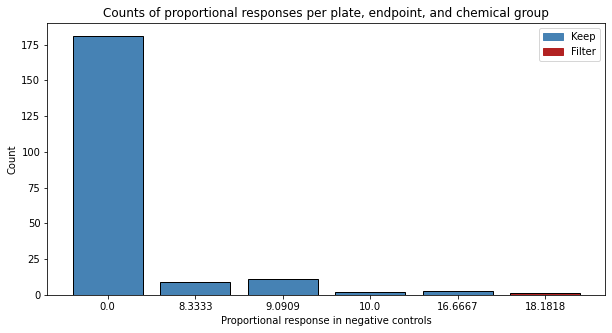

In [17]:
Long.filter_negative_control(percentage = 18, apply = False, diagnostic_plot = True)

In [18]:
Long.filter_negative_control_df

,Response,Count,Filter
0,0.000000,181,Keep
1,8.333333,9,Keep
2,9.090909,11,Keep
3,10.000000,2,Keep
4,16.666667,3,Keep
5,18.181818,1,Filter


In [19]:
# Apply the negative control filter
Long.filter_negative_control(percentage = 18, apply = True)
Long.plate_groups

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
1,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
2,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Keep,
3,3757,0.0,19877,CFIN,12,12,0.0,3757 19877 CFIN,3757 CFIN,Keep,
4,3757,0.0,19877,CIRC,12,12,0.0,3757 19877 CIRC,3757 CIRC,Keep,
...,...,...,...,...,...,...,...,...,...,...,...
1651,3863,10.0,20637,SOMI,12,6,0.0,3863 20637 SOMI,3863 SOMI,Keep,
1652,3863,10.0,20637,SWIM,12,6,0.0,3863 20637 SWIM,3863 SWIM,Keep,
1653,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Keep,
1654,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Keep,


#### Minimum Concentration Filter

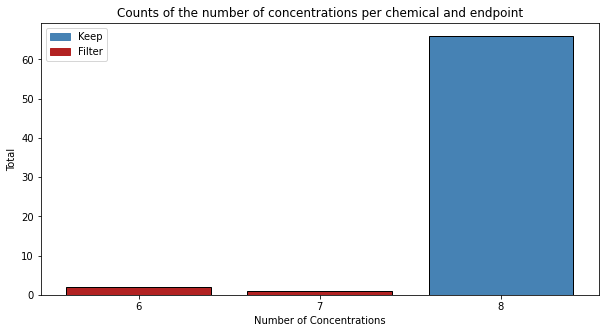

In [20]:
Long.filter_min_concentration(count = 8, apply = False, diagnostic_plot = True)

In [21]:
Long.filter_min_concentration_df

,NumConc,Count,Filter
1,6,2,Filter
2,7,1,Filter
0,8,66,Keep


In [22]:
# Apply the minimum concentration filter
Long.filter_min_concentration(count = 8, apply = True)
Long.plate_groups[Long.plate_groups["bmdrc.Endpoint.ID"] == "3863 ANY24"]

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
1104,3863,0.000,20312,ANY24,12,12,1.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1127,3863,0.000,20627,ANY24,12,11,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1150,3863,0.000,20637,ANY24,12,12,1.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1173,3863,0.100,20312,ANY24,12,12,3.0,3863 20312 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1196,3863,0.100,20627,ANY24,12,9,1.0,3863 20627 ANY24,3863 ANY24,Remove,min_concentration_filter
1219,3863,0.100,20637,ANY24,12,11,3.0,3863 20637 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1242,3863,0.254,20312,ANY24,12,12,2.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter
1265,3863,0.254,20627,ANY24,12,11,3.0,3863 20627 ANY24,3863 ANY24,Remove,negative_control_filter min_concentration_filter
1288,3863,0.254,20637,ANY24,12,12,2.0,3863 20637 ANY24,3863 ANY24,Remove,min_concentration_filter
1311,3863,0.645,20312,ANY24,12,12,0.0,3863 20312 ANY24,3863 ANY24,Remove,min_concentration_filter


#### Correlation Score Filter

In [52]:
import numpy as np

# Pull plate groups
CorScore = Long.plate_groups

# First, only keep the values that aren't being filtered
CorScore = CorScore.loc[CorScore["bmdrc.filter"] == "Keep", [Long.concentration, "bmdrc.Endpoint.ID", "bmdrc.num.nonna", "bmdrc.num.affected"]]

# Sum up counts
CorScore = CorScore.groupby(["conc", "bmdrc.Endpoint.ID"]).sum().reset_index()

# Calculate response
CorScore["Response"] = CorScore["bmdrc.num.affected"] / CorScore["bmdrc.num.nonna"]

# Sort data.frame appropriately
CorScore.sort_values(by = ["bmdrc.Endpoint.ID", Long.concentration])

# Calculate spearman correlations
CorScore = CorScore[["conc", "bmdrc.Endpoint.ID", "Response"]].groupby(["bmdrc.Endpoint.ID"]).corr(method = "spearman").unstack().iloc[:,1].reset_index()

# Fix index issues 
CorScore = CorScore.set_axis(["bmdrc.Endpoint.ID", "Spearman"], axis = 1)

# Set NA values (cases of a consistent value across all wells) to 0
CorScore.loc[np.isnan(CorScore["Spearman"]), "Spearman"] = 0

# Set the filter to leep
CorScore["Filter"] = "Keep"

# Filter cases with less than 0.2 as their correlation score
CorScore.loc[CorScore["Spearman"] < 0.2, "Filter"] = "Remove"

CorScore


,bmdrc.Endpoint.ID,Spearman,Filter
0,3757 ANY24,0.610789,Keep
1,3757 AXIS,0.247436,Keep
2,3757 BRAI,-0.082479,Remove
3,3757 CFIN,0.000000,Remove
4,3757 CIRC,0.155870,Remove
...,...,...,...
61,3863 SOMI,0.545545,Keep
62,3863 SWIM,0.000000,Remove
63,3863 TRUN,-0.155870,Remove
64,3863 TR__,0.082479,Remove


Filter suggestions: 
- Add a filter to remove a concentration if it doesn't have enough non-NA values 